In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ralph\OneDrive\Desktop\jupyter\movies-data\data\netflix_titles.csv")
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

<h1 style="color: red">Data Cleaning<h1>

In [3]:
df = df.drop_duplicates()

# fill missing values in key columns
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

df['release_year'] = df['release_year'].astype(int)


## Most Common Genres

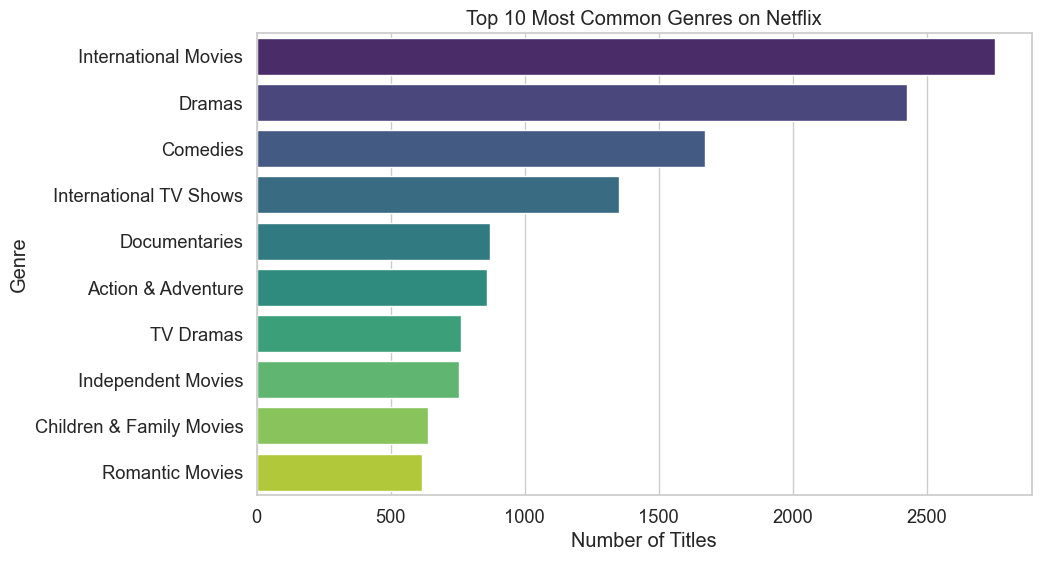

In [4]:
top_genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis", hue=top_genres.index , legend=False, dodge=False)
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


## Movies vs Tv shows

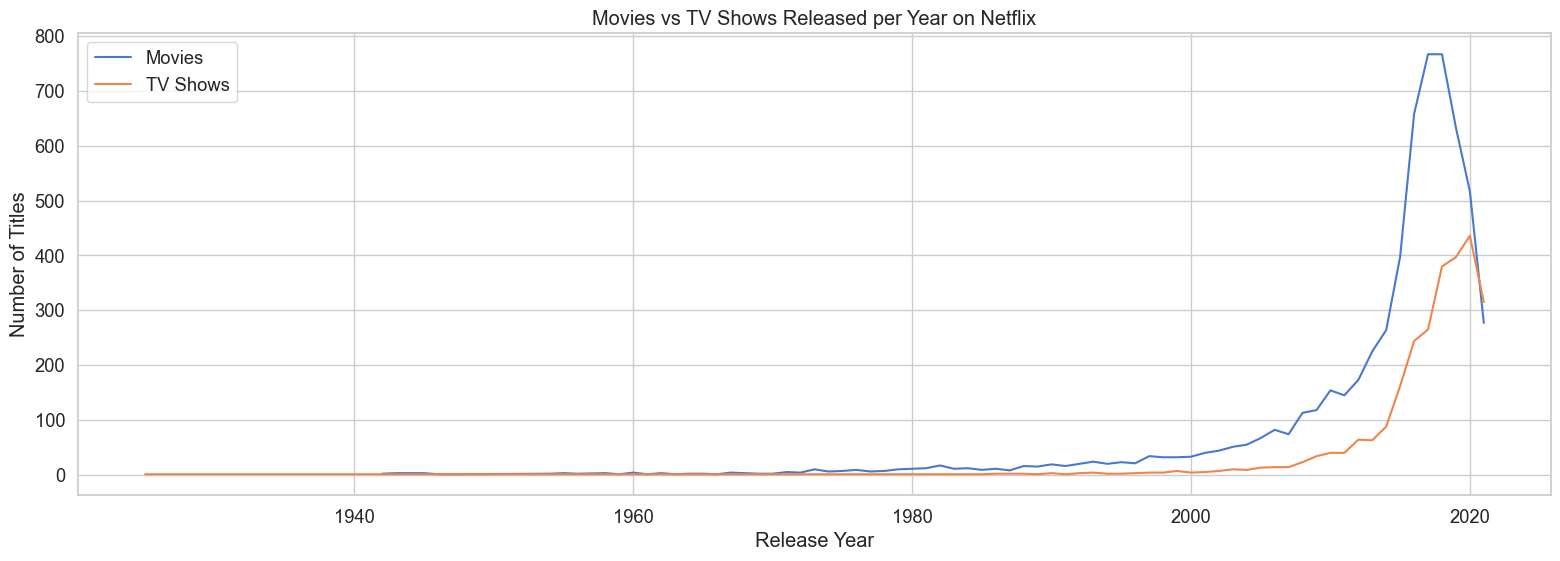

In [5]:
movies = df[df['type'] == "Movie"]
shows = df[df['type'] == "TV Show"]

movies_yearly = movies['release_year'].value_counts().sort_index()
shows_yearly = shows['release_year'].value_counts().sort_index()

plt.figure(figsize=(19,6))
sns.lineplot(x=movies_yearly.index, y=movies_yearly.values, label="Movies")
sns.lineplot(x=shows_yearly.index, y=shows_yearly.values, label="TV Shows")
plt.title("Movies vs TV Shows Released per Year on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend()
plt.show()


# top directors

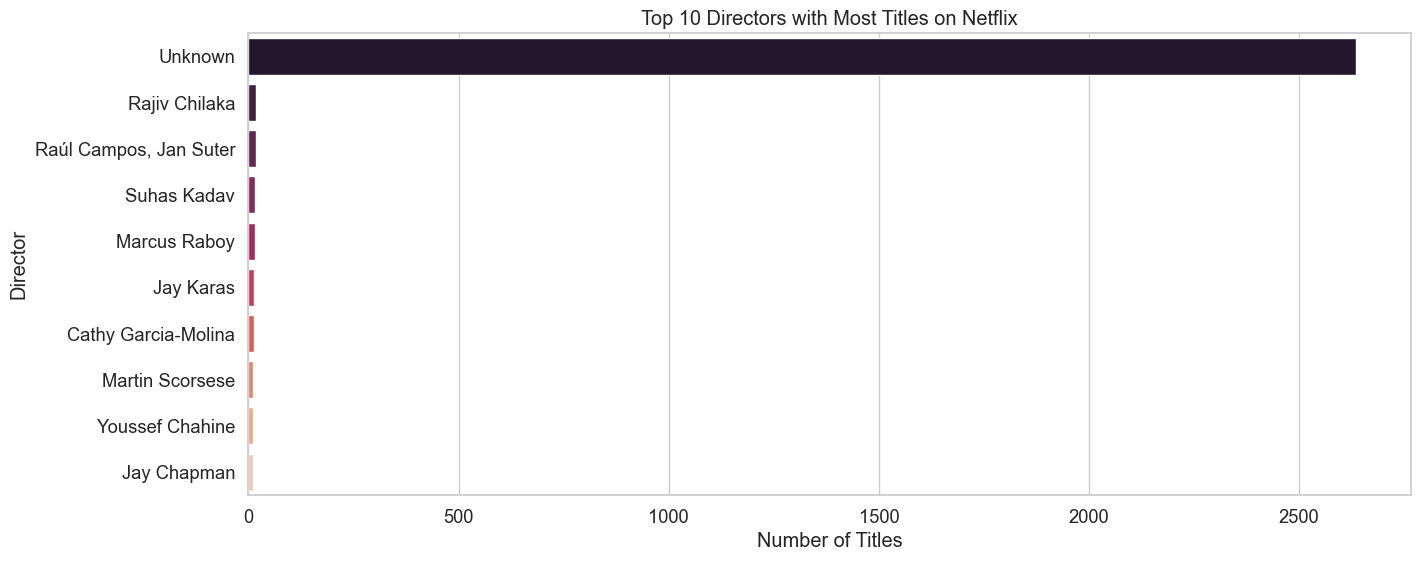

In [6]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(15,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="rocket", hue=top_directors.index , legend=False, dodge=False)
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

# top contries

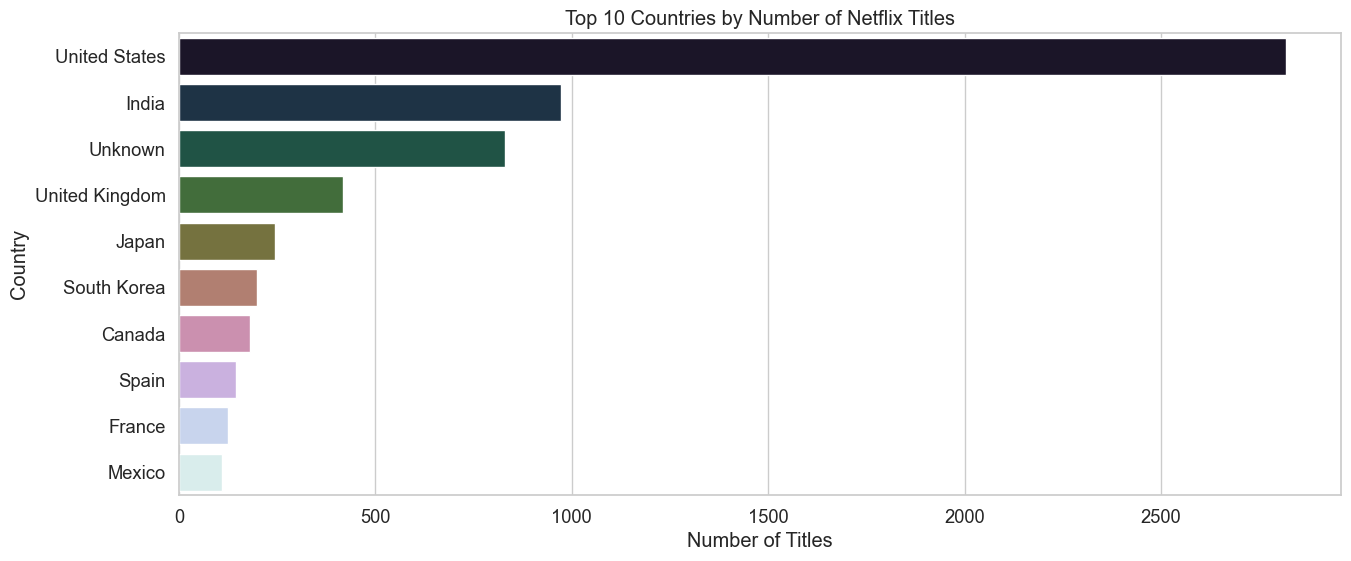

In [7]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(15,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix", hue=top_countries.index , legend=False, dodge=False)
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

# top ratings

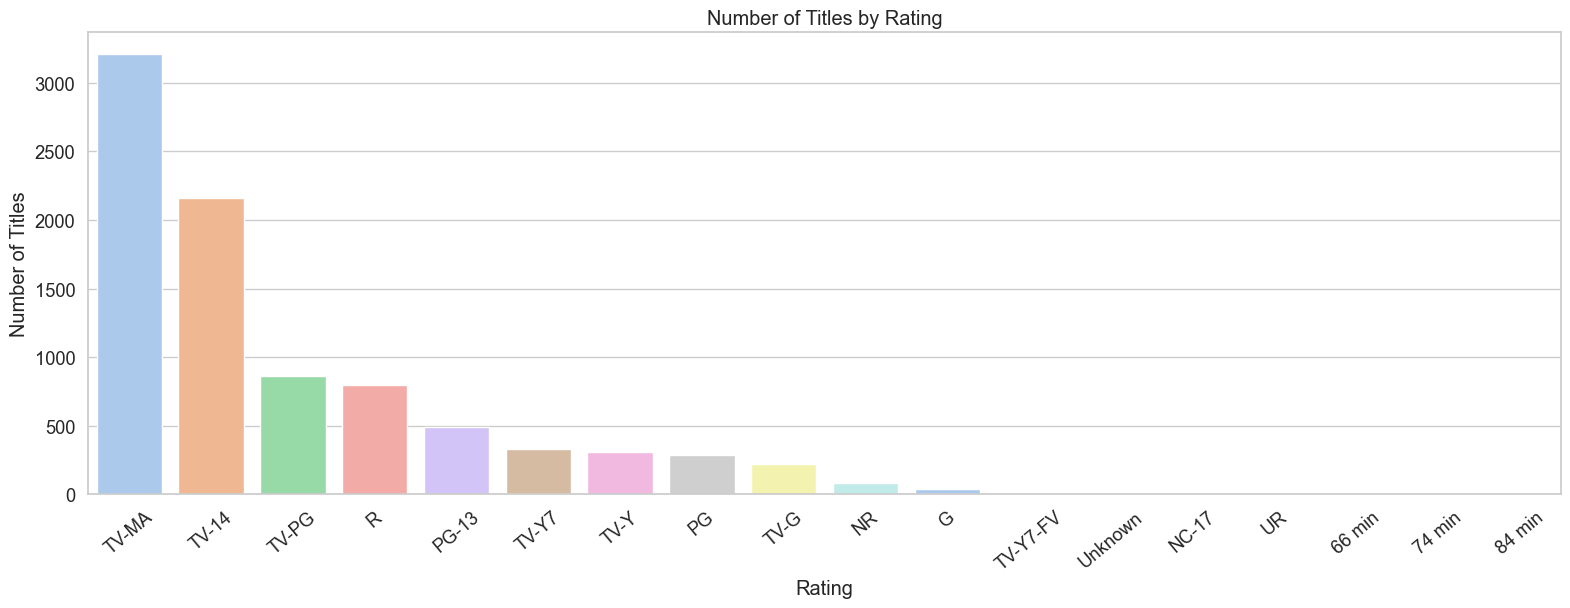

In [14]:
top_ratings = df['rating'].value_counts()
plt.figure(figsize=(19,6))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette="pastel", hue=top_ratings.index, legend=False, dodge=False)
plt.title("Number of Titles by Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=40)
plt.show()
